## Default of Credit Card Clients

In [91]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

In [92]:
df_original = pd.read_excel("input/default of credit card clients.xls",header=1)

In [93]:
df_original =df_original.rename({'PAY_0' : 'PAY_1','default payment next month':'default'},axis=1)

In [94]:
df = df_original.copy()

In [95]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

There is no missing data

In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## stratifiedshuffle on SEX and default

In [97]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

In [98]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 inactive account ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10


In [100]:
df = df_train

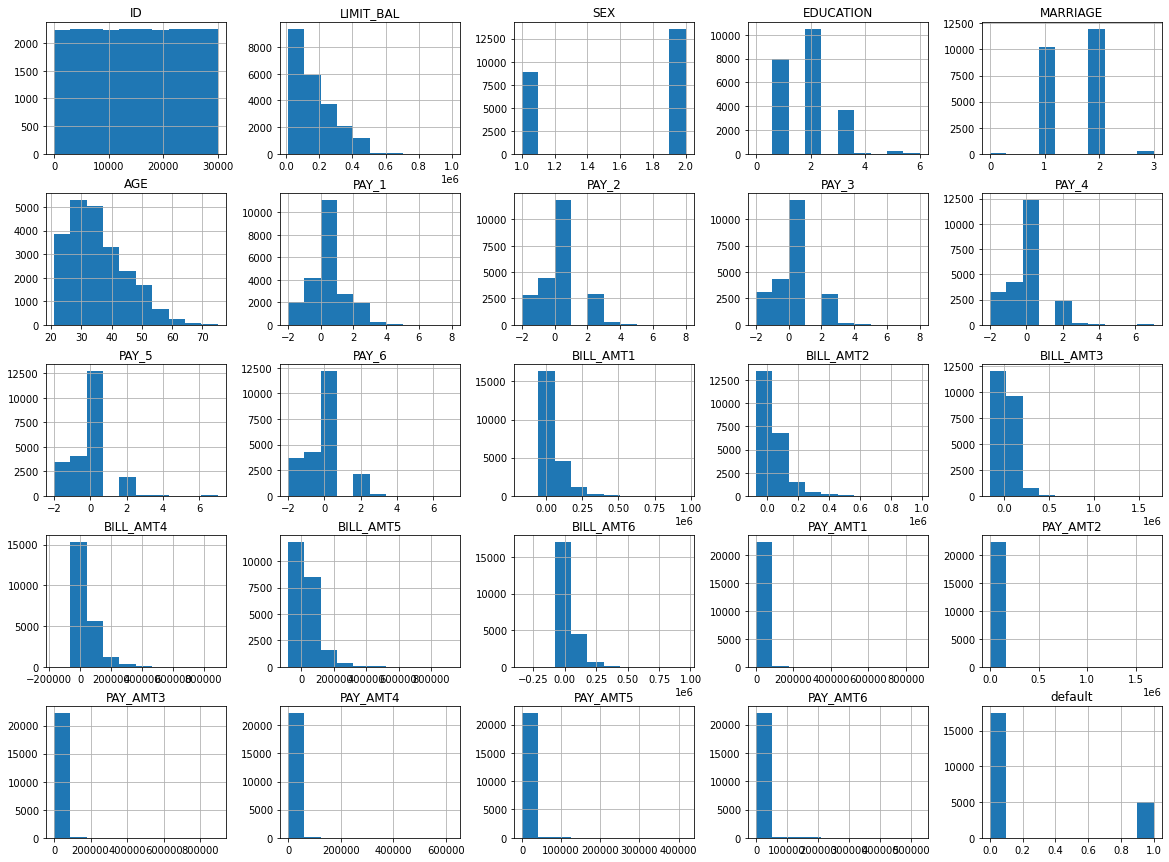

In [101]:
import matplotlib.pyplot as plt
df.hist(figsize= (20,15))
plt.show()

## New attribute "Month usage approximation" (5 of them used_app_1 - used_app_5

In [102]:
df_usage = pd.DataFrame()
BILL = []
PAY = []
for i in df.columns:
    if 'BILL' in i:
        BILL.append(i)
for i in df.columns:
    if "PAY_AMT" in i:
        PAY.append(i)
for i in range(5):
    df_usage[f"used_app_{i+1}"] = df[BILL[i]]-(df[BILL[i+1]]-df[PAY[i+1]])


print(BILL+PAY)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


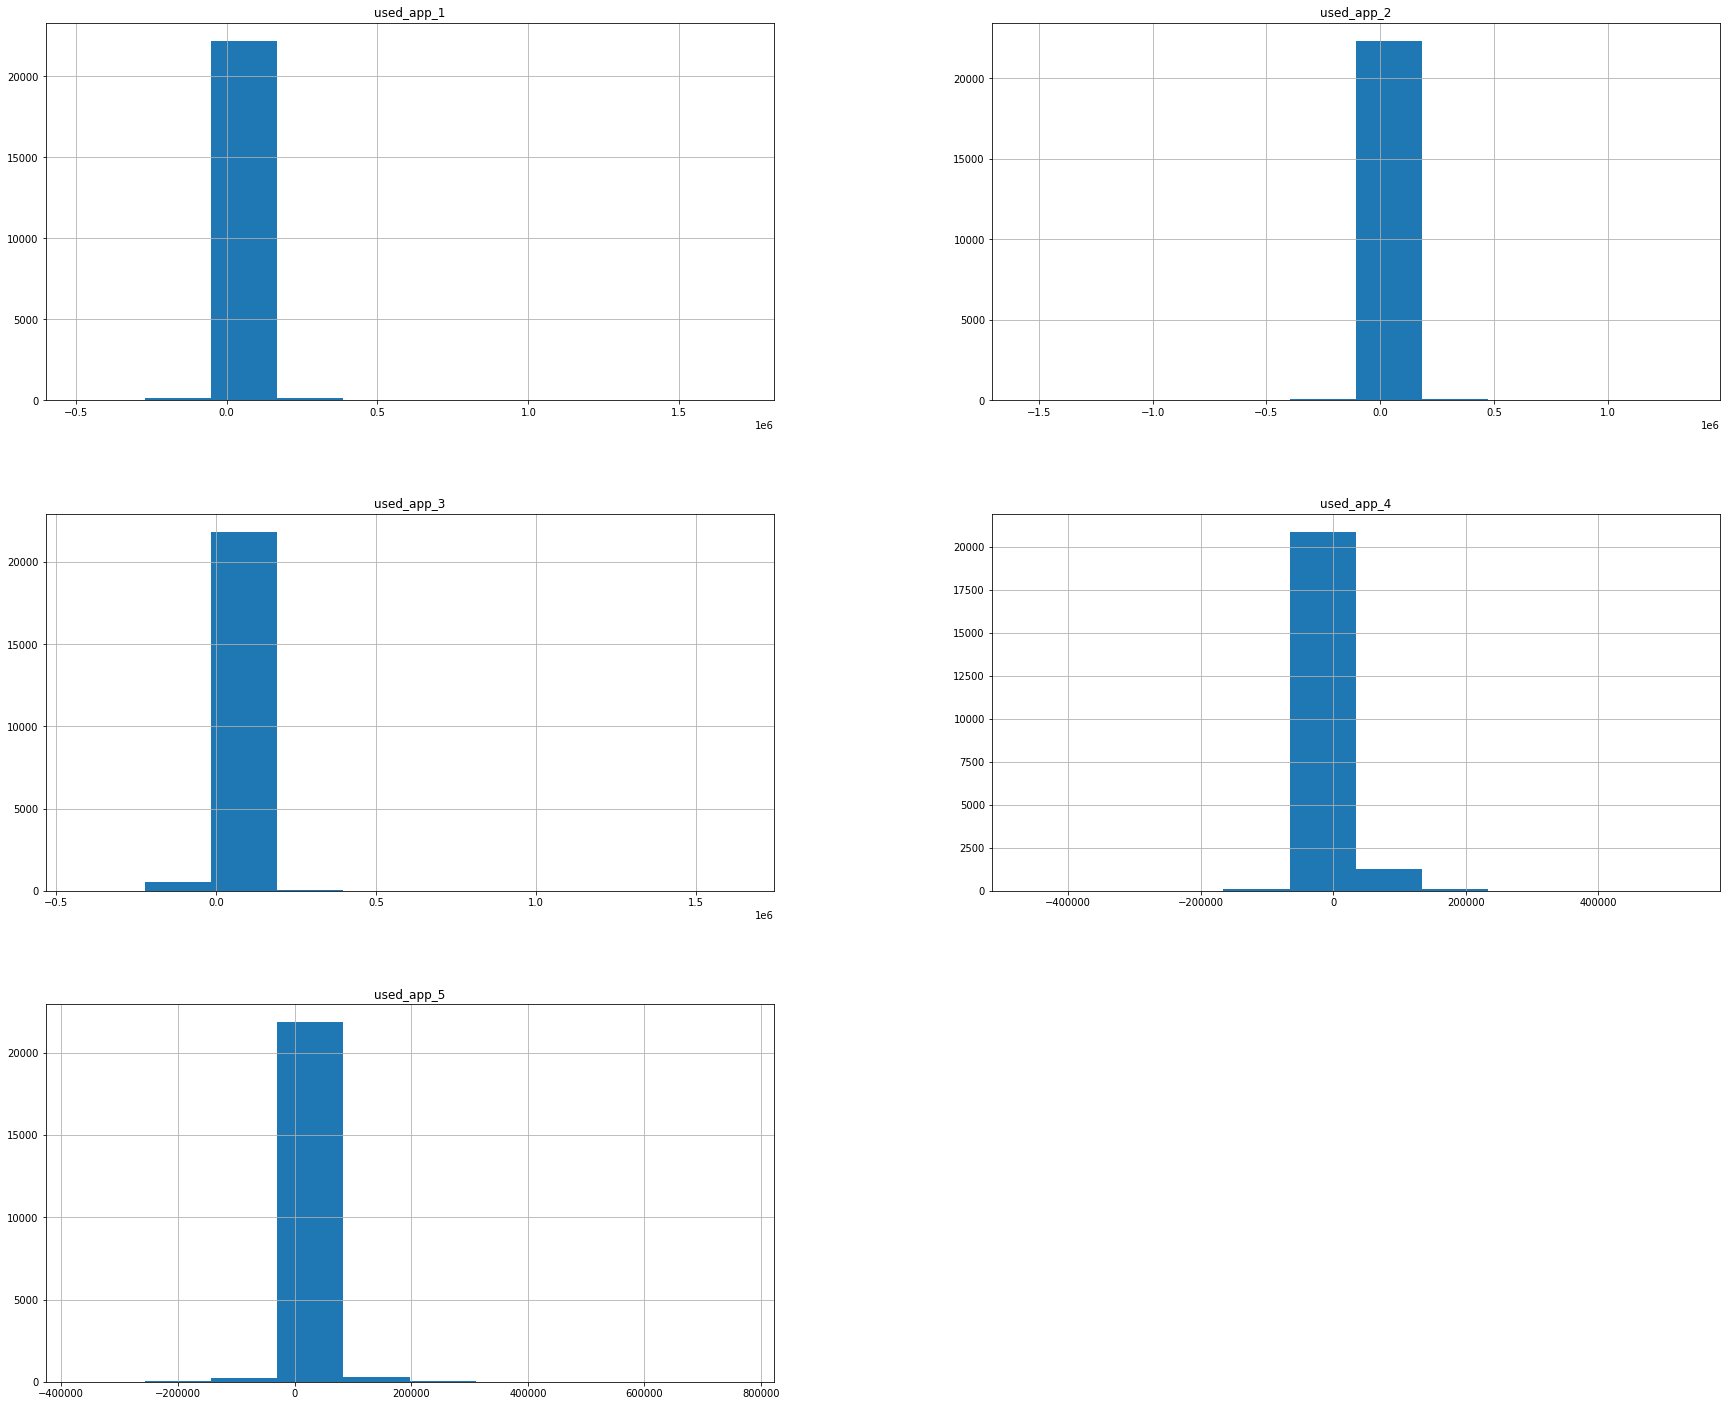

In [103]:
df_usage.hist(figsize=(30,25))
plt.show()

## BOX COX or other functions

## Logarithmic Scaling attribute (for BILLING and PAY_amount) total 12

In [104]:
def log_pre (x):
    if abs(x)<5:
        return 0
    return np.log(abs(x))*x/abs(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))

In [105]:
x = (df<5).sum()-(df<1).sum()
print(x)

ID               4
LIMIT_BAL        0
SEX          22500
EDUCATION    22236
MARRIAGE     22459
AGE              0
PAY_1         5029
PAY_2         3251
PAY_3         3127
PAY_4         2555
PAY_5         2157
PAY_6         2264
BILL_AMT1        2
BILL_AMT2        1
BILL_AMT3        4
BILL_AMT4        2
BILL_AMT5        3
BILL_AMT6        1
PAY_AMT1        44
PAY_AMT2        51
PAY_AMT3        51
PAY_AMT4        54
PAY_AMT5        45
PAY_AMT6        33
default       4977
dtype: int64


In [106]:
df_log =df.iloc[:,12:-1].apply(log_pre_col,axis=0) #apply(function,axis=)

In [107]:
rename_dict = {}
for i in df_log.columns:
    rename_dict[i] = 'log_'+i

In [108]:
df_log =df_log.rename(rename_dict,axis=1)

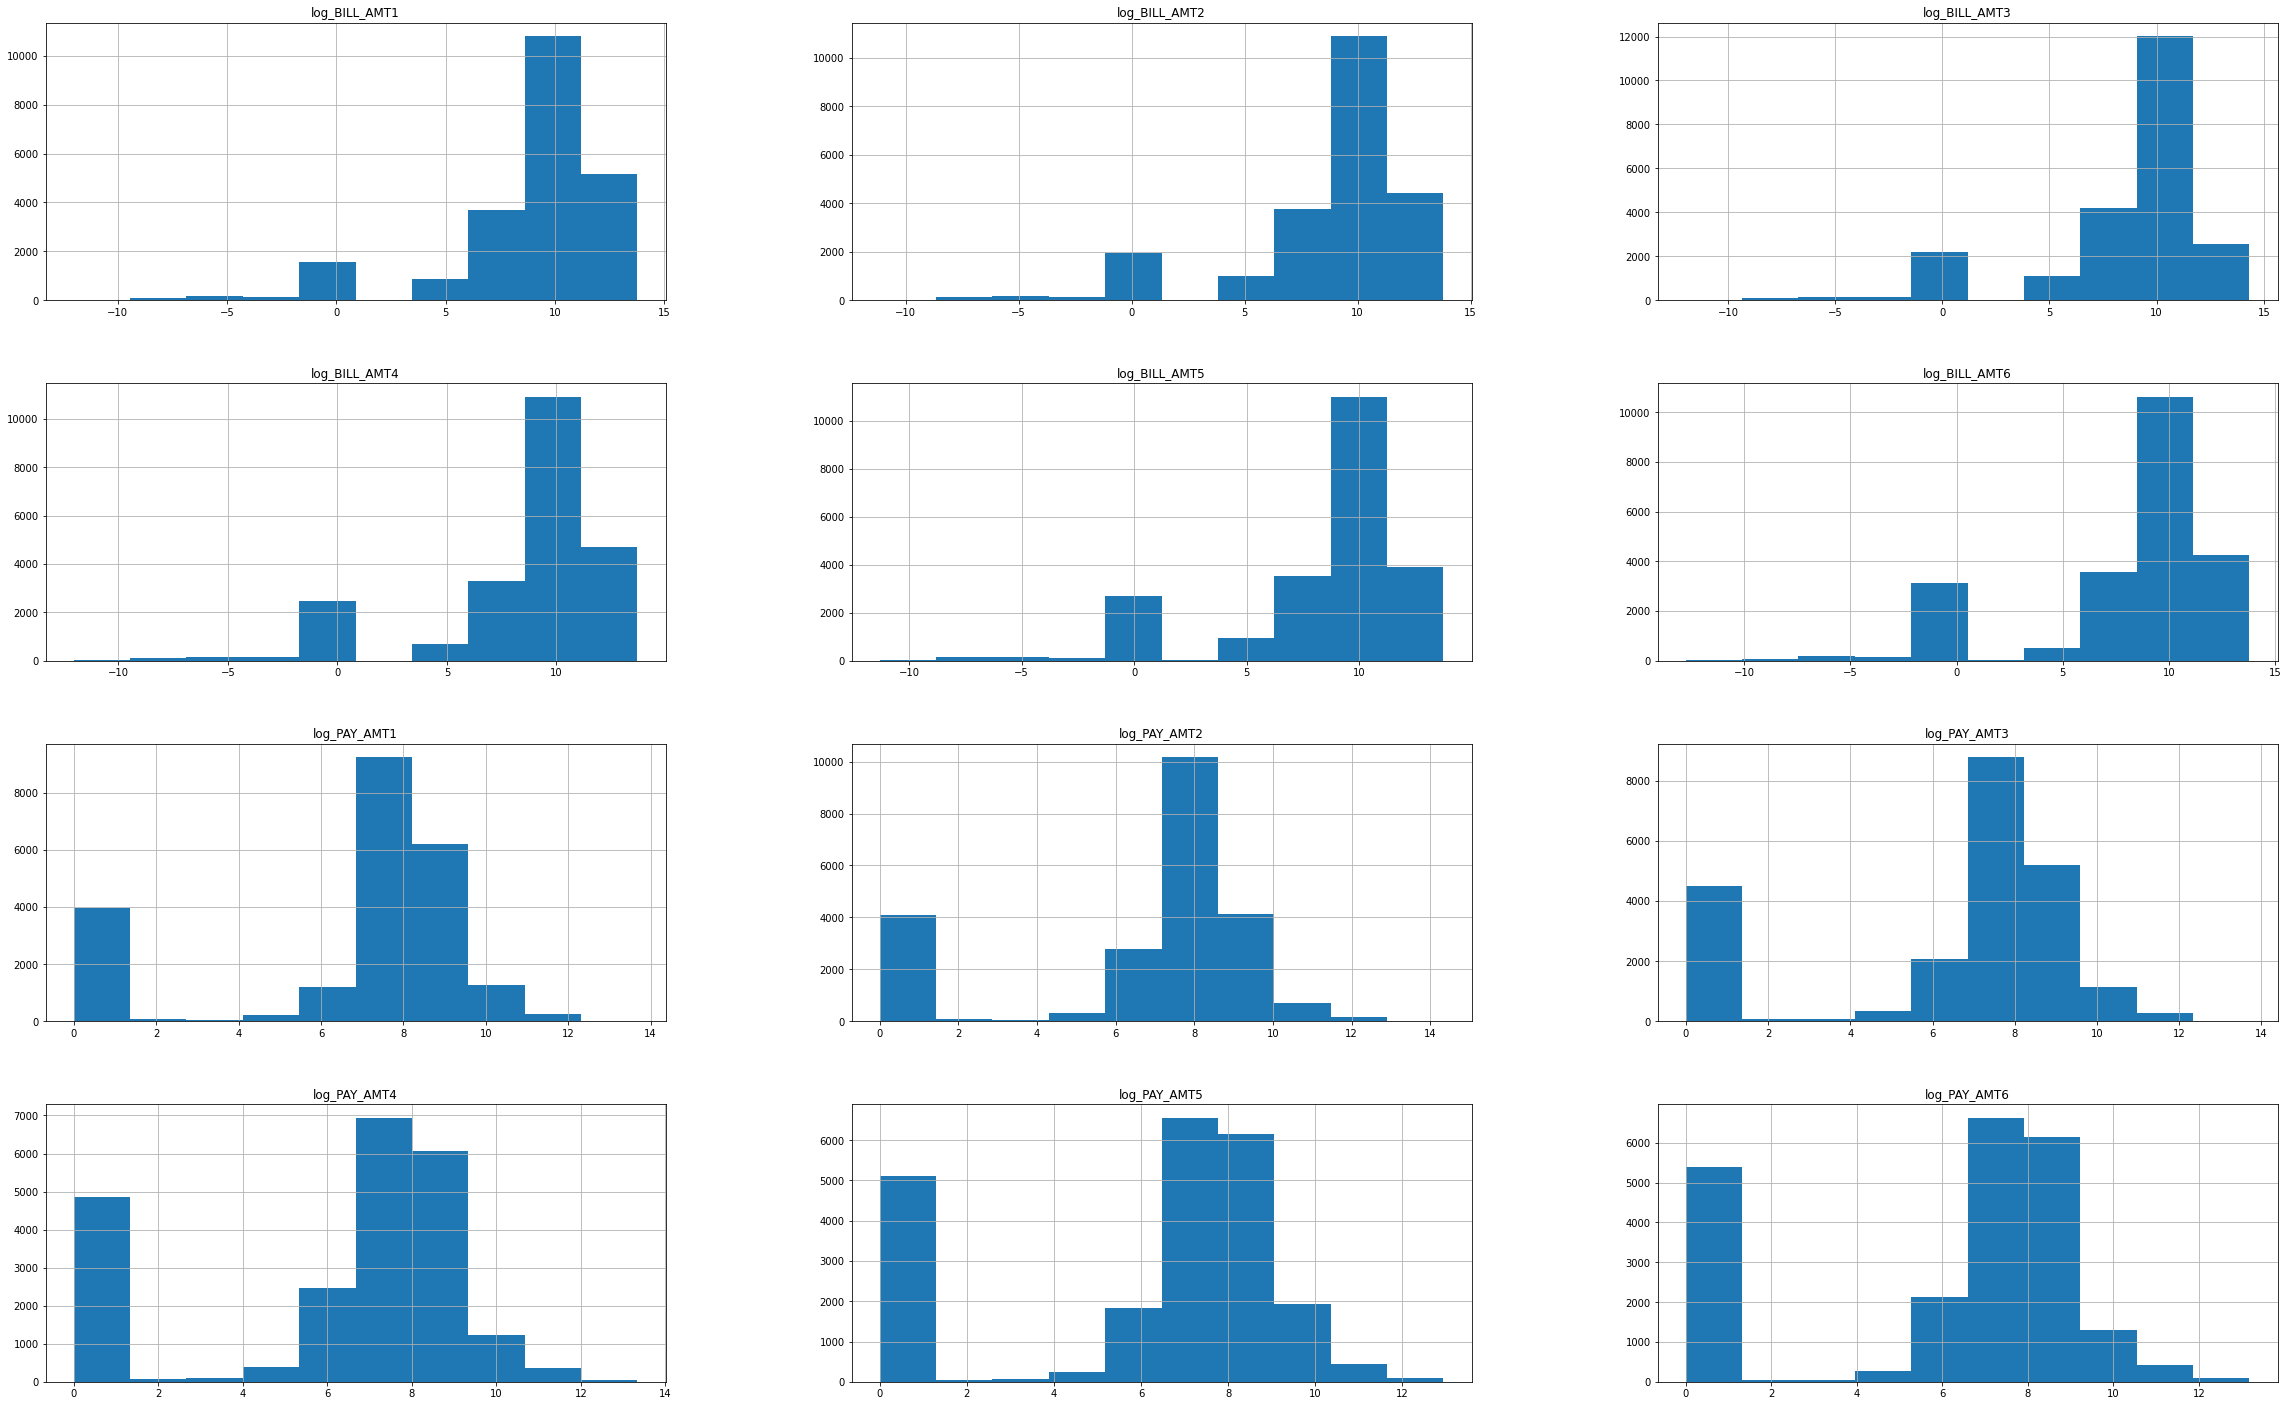

In [109]:
df_log.hist(figsize=(40,25))
plt.show()

## comparison with non log scale

In [110]:
len(BILL+PAY)

12

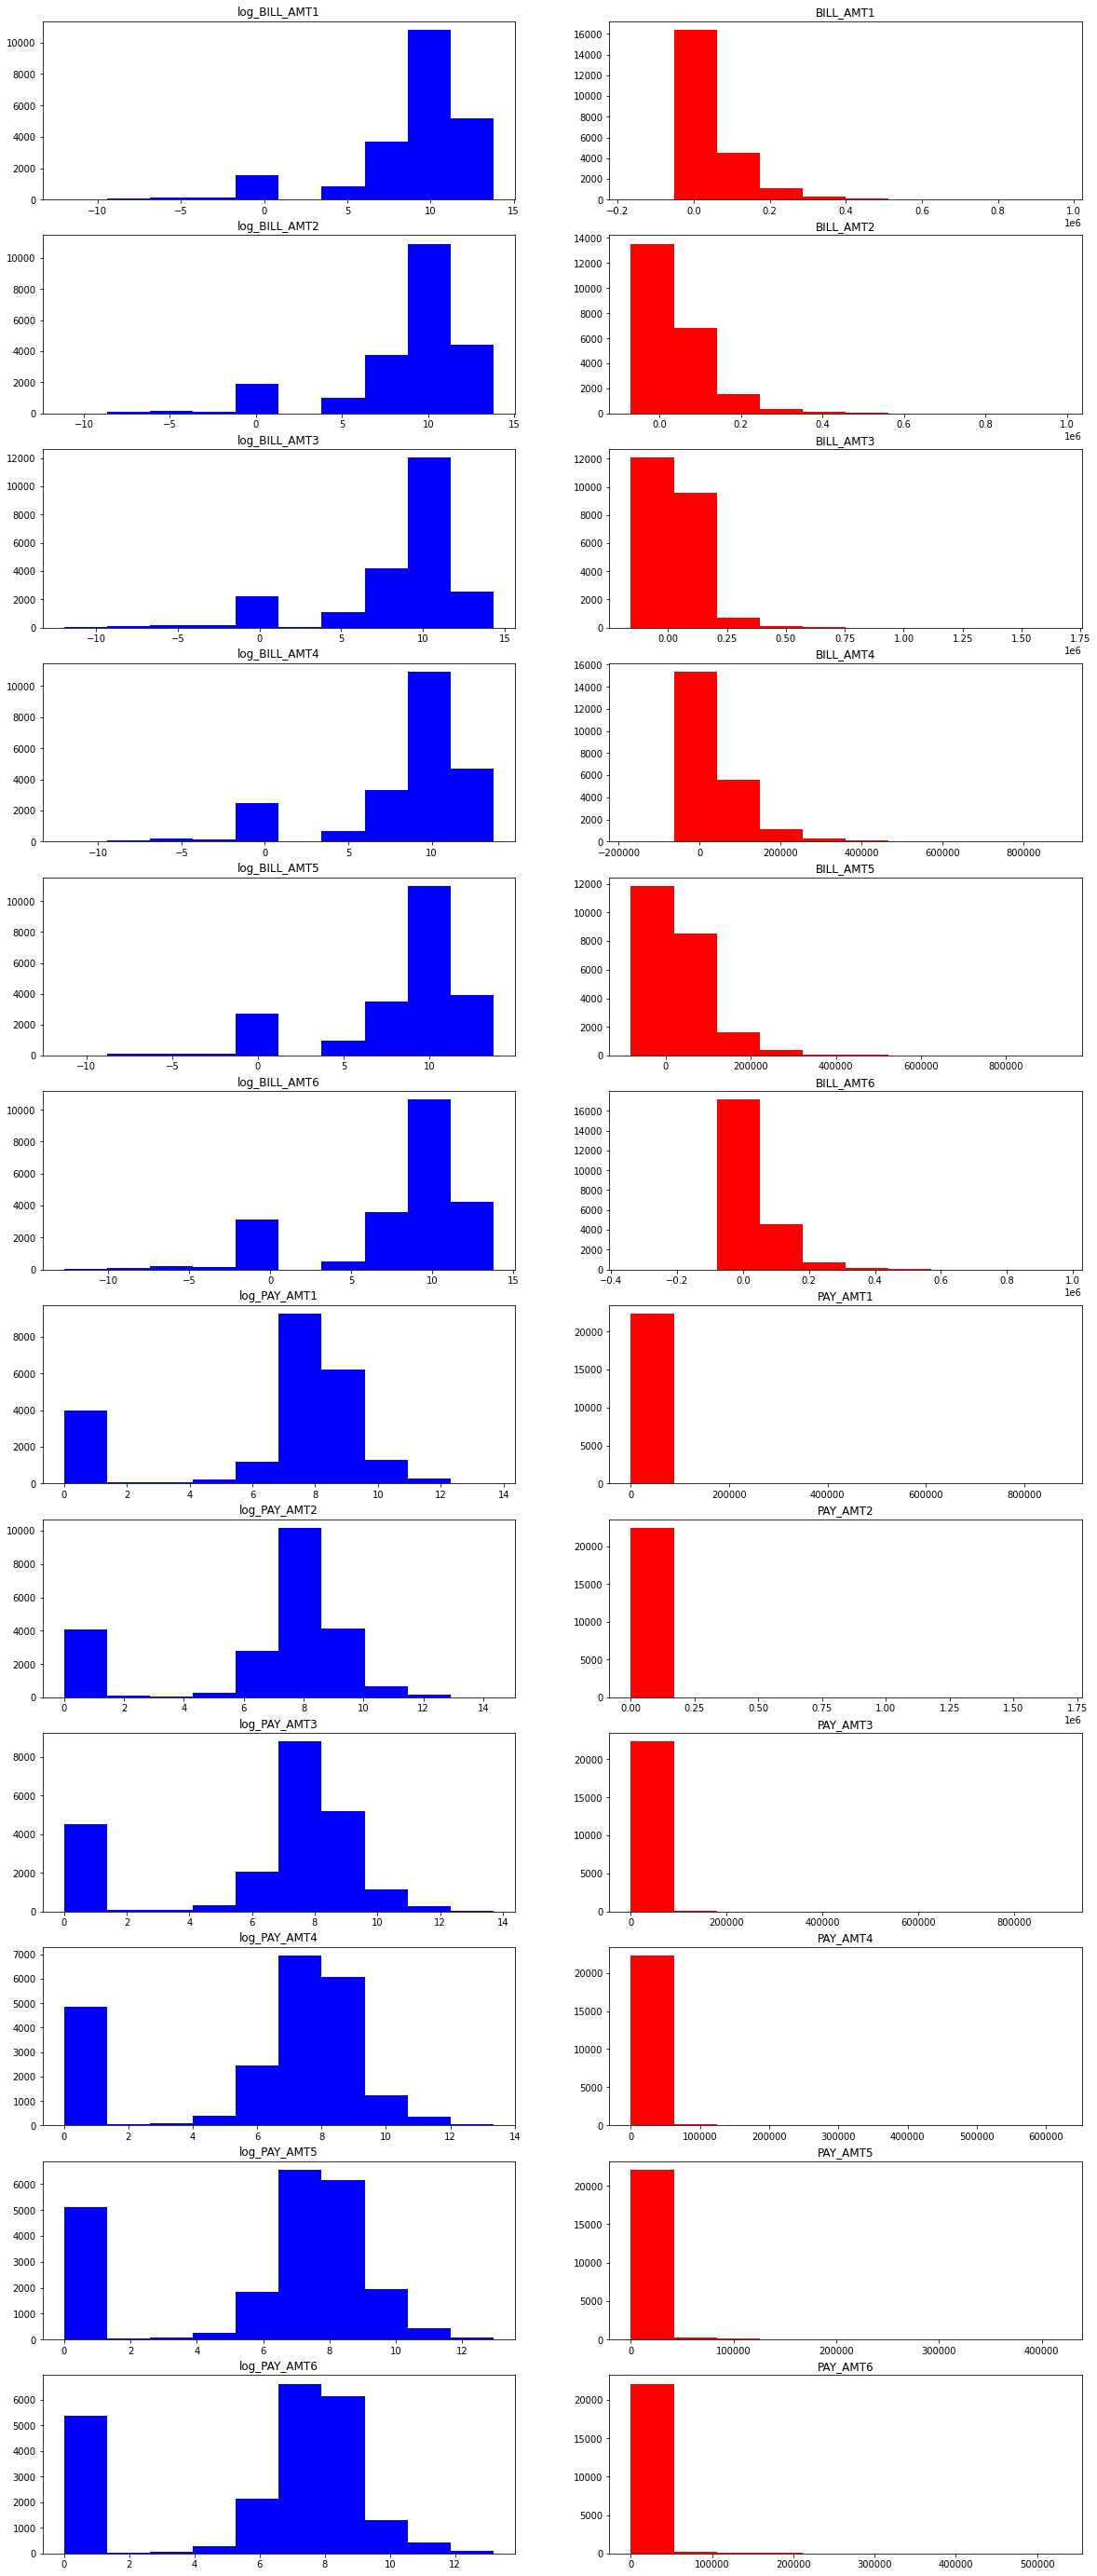

In [111]:
fig, axes = plt.subplots(12,2, num=1, clear=True, figsize=(20,50))

for i in range(12):
    axes[i,0].hist(df_log.iloc[:,i],color='b')
    axes[i,0].set_title(df_log.columns[i])
k=0
for i in BILL+PAY:
    axes[k,1].hist(df[i],color='r')
    axes[k,1].set_title(i)
    k+=1
plt.show()

In [112]:
df_log.describe()

,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,8.963948,8.756074,8.631158,8.473952,8.314486,8.081983,6.634320,6.564066,6.291826,6.078322,6.017167,5.941555
std,3.541697,3.789721,3.879237,3.968312,4.024370,4.213010,3.250165,3.282292,3.357053,3.400847,3.455247,3.525089
min,-12.017210,-11.153060,-11.965681,-12.043554,-11.306319,-12.735533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.190632,8.039157,7.928046,7.782807,7.511935,7.135488,6.907755,6.745236,5.981414,5.703782,5.483757,4.932669
50%,10.033528,9.985597,9.916428,9.861337,9.811564,9.754320,7.650169,7.606387,7.509335,7.313220,7.313220,7.313220
75%,11.113757,11.061178,11.001721,10.907991,10.821617,10.804375,8.517793,8.517193,8.419250,8.295611,8.294799,8.294050
max,13.779377,13.799311,14.324788,13.700757,13.739893,13.776420,13.680323,14.336836,13.705740,13.339086,12.943213,13.178112


In [113]:
df[BILL+PAY].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,51245.067778,49206.147733,4.701756e+04,43418.400756,40429.360489,38946.791822,5650.333644,5.961813e+03,5315.743644,4881.652578,4794.299200,5260.496311
std,73507.326943,71120.080694,6.945343e+04,64511.798629,60983.707777,59701.813056,16688.006347,2.448806e+04,18169.839098,16304.685745,15238.981992,18312.417605
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3607.000000,3100.000000,2.774000e+03,2399.000000,1829.750000,1255.750000,1000.000000,8.500000e+02,396.000000,300.000000,240.750000,138.750000
50%,22777.500000,21711.500000,2.026050e+04,19174.500000,18243.500000,17228.500000,2101.000000,2.011000e+03,1825.000000,1500.000000,1500.000000,1500.000000
75%,67087.750000,63651.500000,5.997725e+04,54611.000000,50092.000000,49235.750000,5003.000000,5.000000e+03,4533.500000,4006.250000,4003.000000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,528666.000000


In [114]:
df_log

,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
20349,11.277203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,5.739793,6.721426,5.416100,0.000000,0.000000,0.000000,6.723832,5.416100,0.000000,0.000000,0.000000,0.000000
17548,10.835770,10.839189,10.856573,10.855300,9.737492,9.758173,7.600902,7.649693,7.244228,6.396930,6.907755,6.907755
954,7.787382,7.673688,7.678326,7.449498,11.586092,11.589331,7.673688,7.678326,7.449498,11.586092,8.517193,8.160518
12866,9.913190,9.885222,9.752548,9.564723,9.824174,9.538060,7.226936,7.021976,6.131226,8.699515,6.436150,7.600902
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,7.885705,8.258163,9.278840,9.068431,8.370548,7.885705,8.258163,9.278840,6.907755,4.605170,6.907755,7.957177
19277,7.910957,7.425954,6.338594,11.029456,10.973031,10.973031,7.425954,6.338594,11.029456,0.000000,0.000000,8.407378
23975,10.192194,9.239705,9.186867,9.082280,9.148890,8.834046,7.090077,7.600902,7.600902,6.907755,6.907755,6.907755
12381,0.000000,6.461468,10.366026,10.667443,7.809541,7.836765,6.461468,10.366089,10.858730,10.915088,7.836765,8.651199


In [115]:
df[BILL+PAY]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20349,79000,0,0,0,0,0,0,0,0,0,0,0
6983,311,830,225,0,0,0,832,225,0,0,0,0
17548,50806,50980,51874,51808,16941,17295,2000,2100,1400,600,1000,1000
954,2410,2151,2161,1719,107591,107940,2151,2161,1719,107591,5000,3500
12866,20195,19638,17198,14253,18475,13878,1376,1121,460,6000,624,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,2659,3859,10709,8677,4318,2659,3859,10709,1000,100,1000,2856
19277,2727,1679,566,61664,58281,58281,1679,566,61664,0,0,4480
23975,26694,10298,9768,8798,9404,6864,1200,2000,2000,1000,1000,1000
12381,0,640,31762,42935,2464,2532,640,31764,51986,55000,2532,5717


## divided Defaults and non_Defaults

In [116]:
df =pd.concat([df_original,df_log,df_usage],axis=1)

In [117]:
defaults =df.loc[df.default==1]

In [118]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1500.0,2413.0,689.0,0.0,0.0
1,2,120000,2,2,2,26,-1,2,0,0,...,6.907755,6.907755,6.907755,0.000000,7.600902,1957.0,43.0,410.0,-183.0,2194.0
13,14,70000,1,2,2,30,1,2,2,0,...,0.000000,8.006368,8.006368,7.313220,0.000000,-1567.0,4668.0,1919.0,32145.0,-757.0
16,17,20000,1,1,2,24,0,0,2,2,...,0.000000,7.313220,0.000000,7.408531,0.000000,-2634.0,2082.0,-910.0,2083.0,-1199.0
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,5.755742,0.000000,6.448889,5.755742,0.000000,316.0,0.0,948.0,-316.0,316.0


In [119]:
non_defaults = df.loc[df.default==0]

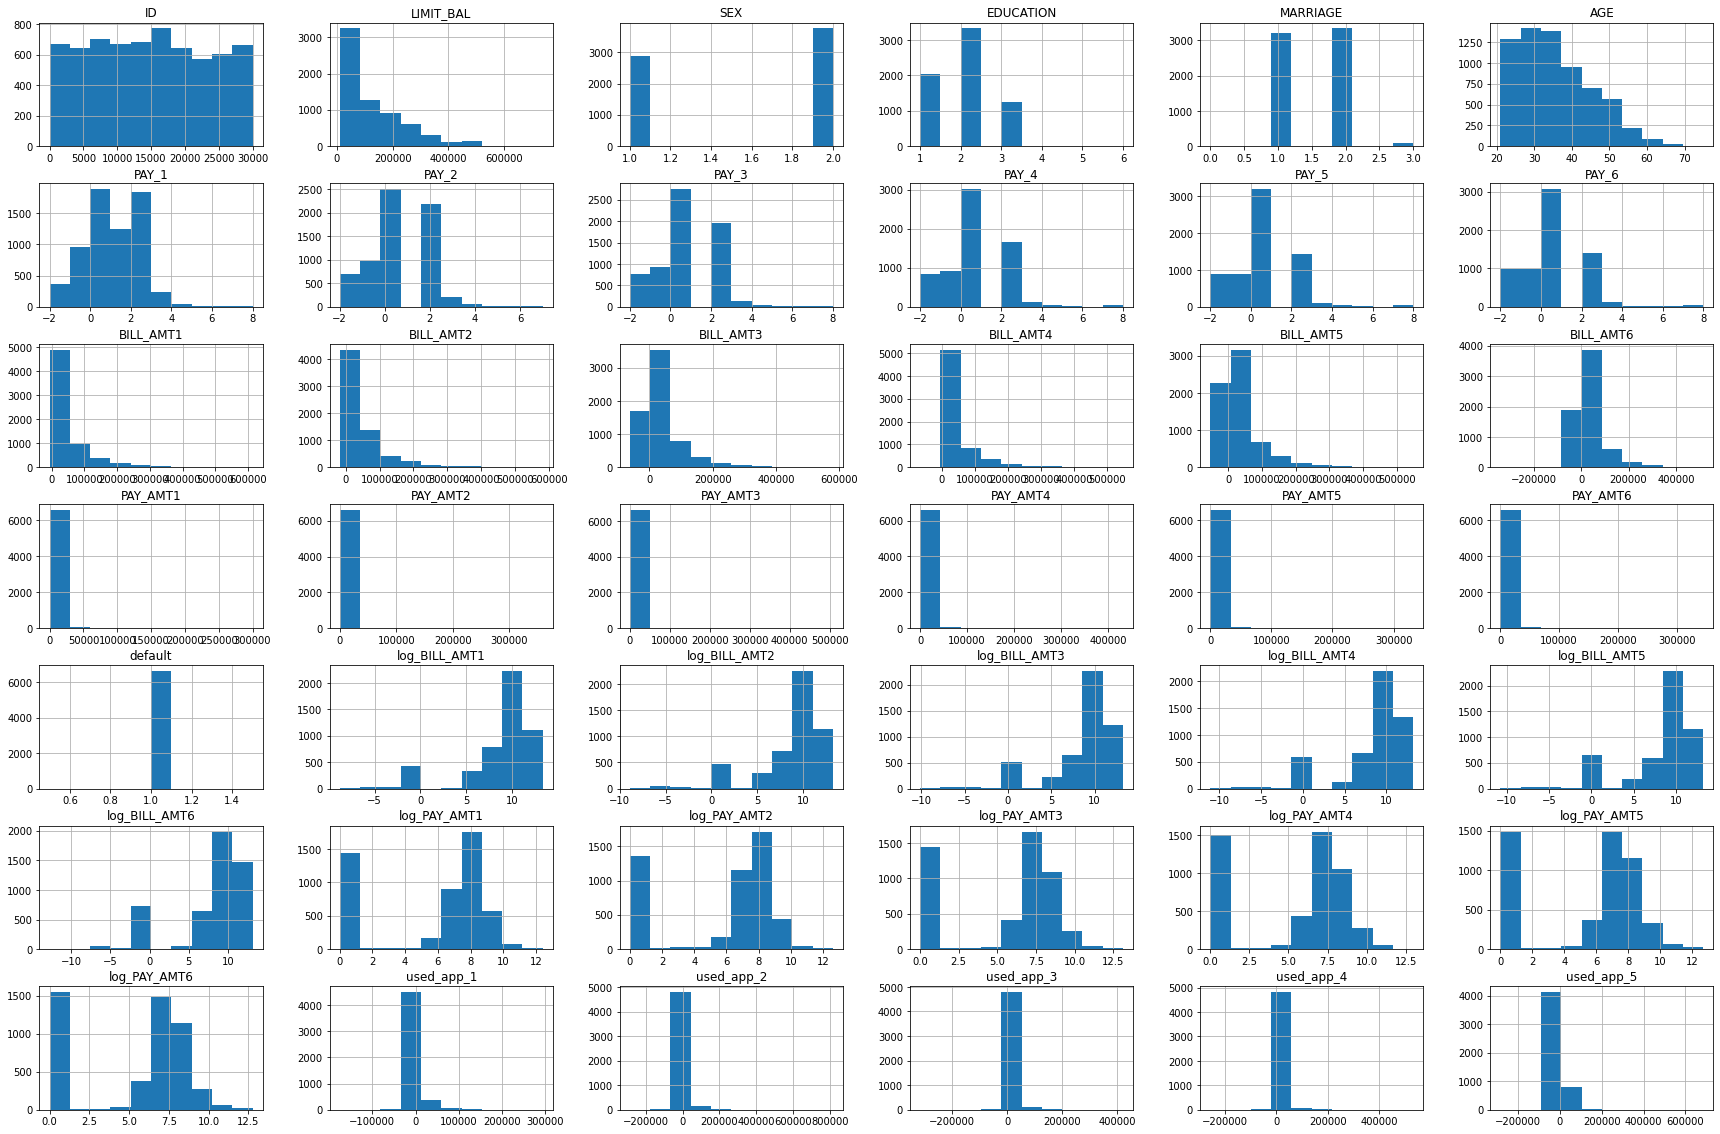

In [120]:
defaults.hist(figsize=(30,20))
plt.show()

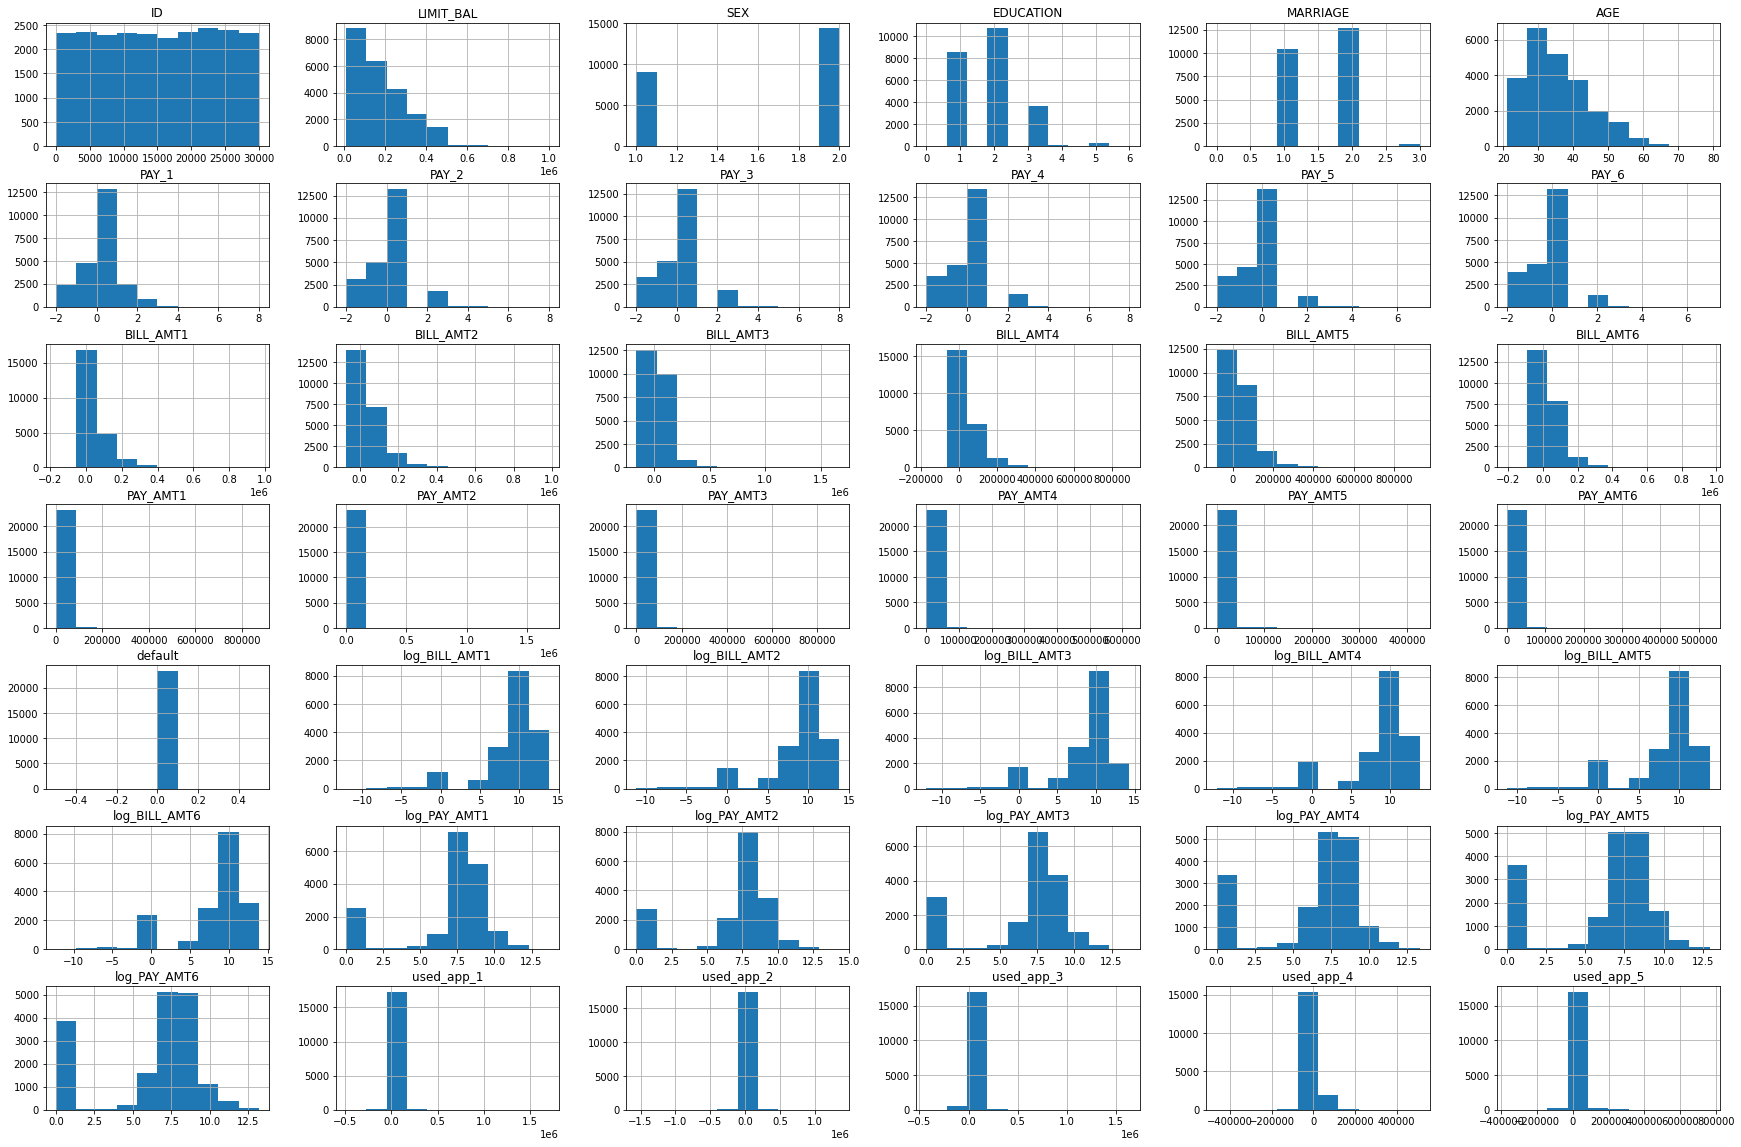

In [121]:
non_defaults.hist(figsize=(30,20))
plt.show()

In [122]:
non_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
2,3,90000,2,2,2,34,0,0,0,0,...,7.313220,6.907755,6.907755,6.907755,8.517193,16712.0,1468.0,228.0,383.0,4399.0
3,4,50000,2,2,1,37,0,0,0,0,...,7.610358,7.090077,7.003065,6.974479,6.907755,776.0,142.0,22077.0,424.0,412.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10.510014,9.210340,9.104980,6.535241,6.520621,39628.0,-20165.0,23895.0,2483.0,694.0
5,6,50000,1,1,2,37,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,500000,1,1,2,29,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
non_defaults.iloc[0]

ID                   3.000000
LIMIT_BAL        90000.000000
SEX                  2.000000
EDUCATION            2.000000
MARRIAGE             2.000000
AGE                 34.000000
PAY_1                0.000000
PAY_2                0.000000
PAY_3                0.000000
PAY_4                0.000000
PAY_5                0.000000
PAY_6                0.000000
BILL_AMT1        29239.000000
BILL_AMT2        14027.000000
BILL_AMT3        13559.000000
BILL_AMT4        14331.000000
BILL_AMT5        14948.000000
BILL_AMT6        15549.000000
PAY_AMT1          1518.000000
PAY_AMT2          1500.000000
PAY_AMT3          1000.000000
PAY_AMT4          1000.000000
PAY_AMT5          1000.000000
PAY_AMT6          5000.000000
default              0.000000
log_BILL_AMT1       10.283259
log_BILL_AMT2        9.548739
log_BILL_AMT3        9.514806
log_BILL_AMT4        9.570180
log_BILL_AMT5        9.612333
log_BILL_AMT6        9.651752
log_PAY_AMT1         7.325149
log_PAY_AMT2         7.313220
log_PAY_AM

In [124]:
non_defaults.iloc[3]

ID                   6.0
LIMIT_BAL        50000.0
SEX                  1.0
EDUCATION            1.0
MARRIAGE             2.0
AGE                 37.0
PAY_1                0.0
PAY_2                0.0
PAY_3                0.0
PAY_4                0.0
PAY_5                0.0
PAY_6                0.0
BILL_AMT1        64400.0
BILL_AMT2        57069.0
BILL_AMT3        57608.0
BILL_AMT4        19394.0
BILL_AMT5        19619.0
BILL_AMT6        20024.0
PAY_AMT1          2500.0
PAY_AMT2          1815.0
PAY_AMT3           657.0
PAY_AMT4          1000.0
PAY_AMT5          1000.0
PAY_AMT6           800.0
default              0.0
log_BILL_AMT1        NaN
log_BILL_AMT2        NaN
log_BILL_AMT3        NaN
log_BILL_AMT4        NaN
log_BILL_AMT5        NaN
log_BILL_AMT6        NaN
log_PAY_AMT1         NaN
log_PAY_AMT2         NaN
log_PAY_AMT3         NaN
log_PAY_AMT4         NaN
log_PAY_AMT5         NaN
log_PAY_AMT6         NaN
used_app_1           NaN
used_app_2           NaN
used_app_3           NaN


In [125]:
defaults.iloc[0]

ID                   1.000000
LIMIT_BAL        20000.000000
SEX                  2.000000
EDUCATION            2.000000
MARRIAGE             1.000000
AGE                 24.000000
PAY_1                2.000000
PAY_2                2.000000
PAY_3               -1.000000
PAY_4               -1.000000
PAY_5               -2.000000
PAY_6               -2.000000
BILL_AMT1         3913.000000
BILL_AMT2         3102.000000
BILL_AMT3          689.000000
BILL_AMT4            0.000000
BILL_AMT5            0.000000
BILL_AMT6            0.000000
PAY_AMT1             0.000000
PAY_AMT2           689.000000
PAY_AMT3             0.000000
PAY_AMT4             0.000000
PAY_AMT5             0.000000
PAY_AMT6             0.000000
default              1.000000
log_BILL_AMT1        8.272060
log_BILL_AMT2        8.039802
log_BILL_AMT3        6.535241
log_BILL_AMT4        0.000000
log_BILL_AMT5        0.000000
log_BILL_AMT6        0.000000
log_PAY_AMT1         0.000000
log_PAY_AMT2         6.535241
log_PAY_AM

In [126]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1500.0,2413.0,689.0,0.0,0.0
1,2,120000,2,2,2,26,-1,2,0,0,...,6.907755,6.907755,6.907755,0.000000,7.600902,1957.0,43.0,410.0,-183.0,2194.0
2,3,90000,2,2,2,34,0,0,0,0,...,7.313220,6.907755,6.907755,6.907755,8.517193,16712.0,1468.0,228.0,383.0,4399.0
3,4,50000,2,2,1,37,0,0,0,0,...,7.610358,7.090077,7.003065,6.974479,6.907755,776.0,142.0,22077.0,424.0,412.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10.510014,9.210340,9.104980,6.535241,6.520621,39628.0,-20165.0,23895.0,2483.0,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8.167919,9.104758,4.859812,0.000000,0.000000,3381.0,7324.0,-5348.0,3789.0,5190.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0.000000,9.998798,8.342840,7.600902,8.039157,209.0,22598.0,-13920.0,2296.0,4325.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
import random 

In [128]:
defaults.iloc[random.randint(0,100)]

ID                  364.000000
LIMIT_BAL        110000.000000
SEX                   1.000000
EDUCATION             1.000000
MARRIAGE              1.000000
AGE                  40.000000
PAY_1                 1.000000
PAY_2                -2.000000
PAY_3                -1.000000
PAY_4                 0.000000
PAY_5                -1.000000
PAY_6                -1.000000
BILL_AMT1             0.000000
BILL_AMT2             0.000000
BILL_AMT3          2066.000000
BILL_AMT4          2000.000000
BILL_AMT5           216.000000
BILL_AMT6           216.000000
PAY_AMT1              0.000000
PAY_AMT2           2066.000000
PAY_AMT3              0.000000
PAY_AMT4            216.000000
PAY_AMT5            216.000000
PAY_AMT6             66.000000
default               1.000000
log_BILL_AMT1         0.000000
log_BILL_AMT2         0.000000
log_BILL_AMT3         7.633370
log_BILL_AMT4         7.600902
log_BILL_AMT5         5.375278
log_BILL_AMT6         5.375278
log_PAY_AMT1          0.000000
log_PAY_

In [129]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1500.0,2413.0,689.0,0.0,0.0
1,2,120000,2,2,2,26,-1,2,0,0,...,6.907755,6.907755,6.907755,0.000000,7.600902,1957.0,43.0,410.0,-183.0,2194.0
13,14,70000,1,2,2,30,1,2,2,0,...,0.000000,8.006368,8.006368,7.313220,0.000000,-1567.0,4668.0,1919.0,32145.0,-757.0
16,17,20000,1,1,2,24,0,0,2,2,...,0.000000,7.313220,0.000000,7.408531,0.000000,-2634.0,2082.0,-910.0,2083.0,-1199.0
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,5.755742,0.000000,6.448889,5.755742,0.000000,316.0,0.0,948.0,-316.0,316.0


In [130]:
non_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,1.752300e+04,1.752300e+04,1.752300e+04,17523.000000,17523.000000
mean,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6.823913,6.537618,6.305734,6.215138,6.146965,9.090045e+03,8.033985e+03,9.060749e+03,8347.795355,7375.472065
std,8684.552145,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,...,3.140523,3.237622,3.300183,3.380773,3.461747,3.665346e+04,3.599893e+04,3.437958e+04,29484.025883,30740.926712
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-4.896410e+05,-1.560346e+06,-4.289720e+05,-465236.000000,-369929.000000
25%,7526.750000,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,6.913737,6.435348,5.966147,5.880533,5.730100,3.450000e+02,1.040000e+02,4.700000e+01,174.500000,59.500000
50%,15073.500000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,7.719574,7.600902,7.461640,7.465655,7.450661,2.560000e+03,2.261000e+03,2.279000e+03,2141.000000,1744.000000
75%,22637.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,8.575462,8.517193,8.433812,8.416599,8.430872,8.856500e+03,8.837500e+03,9.557000e+03,8554.000000,6737.000000
max,29997.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,14.336836,13.705740,13.339086,12.943213,13.178112,1.702472e+06,1.344951e+06,1.640002e+06,509735.000000,764511.000000


In [131]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000
mean,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,5.649199,5.426443,5.277651,5.320152,5.218351,4165.486839,5639.522001,6438.978501,5796.005626,4516.488849
std,8571.616622,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,...,3.592635,3.617138,3.622162,3.620757,3.649029,16762.451985,27700.568528,24364.305425,23177.315459,23672.432091
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-175318.000000,-284900.000000,-315725.000000,-258305.000000,-285000.000000
25%,7408.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14758.500000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,7.363280,7.109879,6.907755,6.907755,6.907755,1234.000000,1076.000000,1083.000000,1115.000000,899.000000
75%,21831.750000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,8.104401,8.006368,7.955074,8.006368,7.992607,4197.000000,4410.000000,5024.000000,4756.000000,3494.000000
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,12.618182,13.138687,12.976482,12.712890,12.752149,293909.000000,814131.000000,420354.000000,533653.000000,685221.000000


## Histogram with Comparison red=defaults

In [132]:
defaults.default.describe()

count    6636.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: default, dtype: float64

In [133]:
non_defaults.default.describe()

count    23364.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: default, dtype: float64

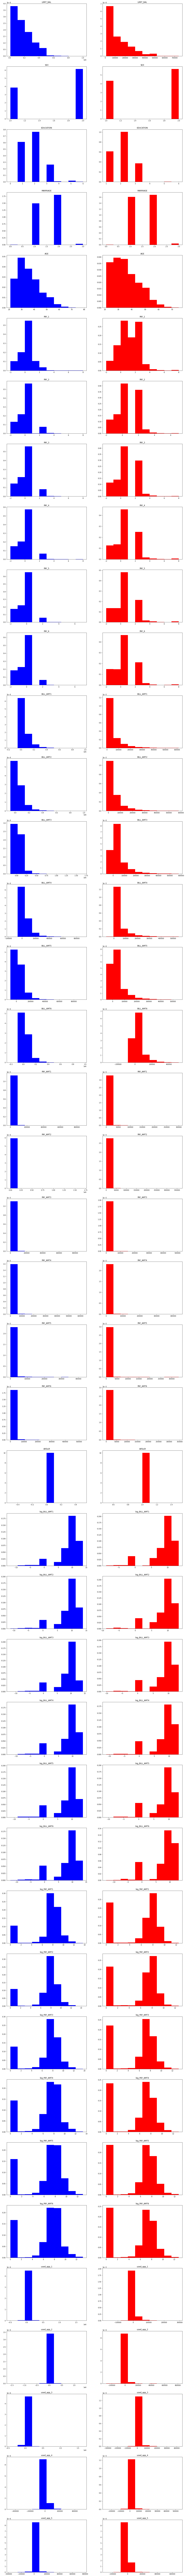

In [134]:
n = len(df.columns)-1
fig, axes = plt.subplots(n,2, num=1, clear=True,figsize=(20,300))

for i in range(n):
    axes[i,0].hist(non_defaults.iloc[:,i+1],density=True , color='b')
    axes[i,0].set_title(df.columns[i+1])

for i in range(n):
    axes[i,1].hist(defaults.iloc[:,i+1],density=True , color='r')
    axes[i,1].set_title(df.columns[i+1])
plt.show()